In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# データの読み込み
df = pd.read_csv("cleaned_dataset_v0.2.csv")

In [4]:
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,UFMR_SDGS_Category
0,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0,35.7,25.4,Africa,Target Not Achieved
1,Algeria,2006,32.34,34.42,30.10,22698.0,12399.0,10299.0,49.5,6.9,Africa,Target Not Achieved
2,Angola,2015,88.34,95.01,81.18,100216.0,54635.0,45581.0,48.3,37.4,Africa,Target Not Achieved
3,Benin,2014,100.13,106.74,93.10,39709.0,21615.0,18094.0,46.6,41.4,Africa,Target Not Achieved
4,Benin,2012,104.60,111.33,97.46,39244.0,21327.0,17917.0,50.4,32.5,Africa,Target Not Achieved



**
*   ⭐️Preprocessing for the mortality dataset
: (includes sample, missing values and its finding i.e., data scarcity occurs in developed countries, it is not random; thus it is difficult to predict the values with the existing data which is mainly come from developing countries. )
*   ⭐️Preprocessing for the breastfeeding dataset (includes a search algorithm and its effect i.e., whether the cost function is 0.)
*   ⭐️Cleaning dataset (includes merging two datasets, variable selection, sample and its finding: imbalanced data.)
*   ⭐️Feature engineering (includes one-hot encoding.)
*   ⭐️Validation (imbalanced data; therefore, it requires 5-fold cross-validation not simply splitting.)
*   ⭐️Model building (includs 3 models and their parameters.)
*   ⭐️Model evaluation (includes these models' metrics and results.)

**





# ⭐️Preprocessing for the mortality dataset

## Missing values
// Purpose: There is a problem of data scarcity; thus, it is important to confirm whether there is a pattern.

// Results: Missing values in developed coutries are more than in developing countries.

// Potential apploaches: 1)use the other values or predict it to fill in the missing values, 2)delete the rows with missing values.

// Decision: This project employs the second approach. THe main reason is sample size after deleting these rows is over 300, meaning it is applicable to implement a machine learning. Additionally, the first approach has the risk that might cause bias by predicting the values with the existing data (in mainly the developing countries).

# ⭐️Preprocessing for the breastfeeding dataset

## Missing values

// Purpose: Find problems about missing values or other data issues.

// Results: There is a problem of year periods, which includes some values are the range of the years, not a single year.

## Alignment of year periods
// Problem and Purpose: There is a problem of year periods, which includes some values are the range of the years, not a single year; thus, it is crucial to select one year from each of these ranges for merging two datasets.

// Results: It is seen that one year exists in another row, and it can be merged into the row that has the range value.

// Potential approaches: 1)use the search algorithm that does not avoid local optima. 2)use the search algorithm that tries to avoid local optima.

// Decision: The first option (i.e., Hill climing algorithm) is better because the local optima could not occure. Moreover, it does not wast the computer resources compared with Simulated annealing, Tabu Search, and Genetic Algorithm.

## Results and analysis of Hill climbing algorithm

// Problem and Purpose: This is for confiring the selected algorithm performs well to align the year to merge two datasets.

// Results: The performance is good.

// Evidence: The chart is given below to confirm the performance of the hill clibming algorithm.

# ⭐️Cleaning dataset

## Merge two datasets into one

## Missing values and Sample information

// Purpose: To confirm whether the dateset is completely filled and can be used for AI/ML models. It also aims to identify potential biases in this section.

// Results: No missing values. However, the most data is related to the developing countries; therefore, it might cause the bias and should be reported in the limitation part.

## Variable selection
// Purpose: To identify the crucial variables and non-crucial variables. Additionaly this project considers additional variables for building a better model.


[For target variable]

// Results: XXX

// Potential approaches: 1) use "under-five mortality rates" (original data) or 2) use "UNICEF's Target Achieved" (Binary).

// Decision: the second approach is employed in this project. The main reason is that it is easier to understand the output of the model than just numerical data. This understandable result help not only technical users but also business members to grasp the results, enabling them to decide the investiment on the health care sector.


[For independent variables]

// Results: XXX

// Potential approaches: 1) use "country" or 2) add "region" based on the countries given in original dataset.

// Desicion: the second approach is a better choice because it can contribute to the decrease of the features, making the model learing faster.

# ⭐️Feature enginnering (It can specify the final input features)

In [5]:
# 1. 目的変数をSDGs基準に基づいて2値分類（UFMRが25以下を「目標達成」、26以上を「目標未達」）
sdgs_labels = ['Target Achieved', 'Target Not Achieved']  # 2つのクラスラベルを定義
df['UFMR_SDGS_Category'] = pd.cut(df['UFMR(per1000births)_Both'], bins=[0, 25, float('inf')], labels=sdgs_labels)

# 2. One-Hot Encoding（Regionをエンコーディング）
df_encoded_ann = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 3. 説明変数と目的変数の定義
features_ann = ['Year', 'Early initiation of breastfeeding (%)',
                'Infants exclusively breastfed for the first six months of life (%)'] + \
               [col for col in df_encoded_ann.columns if col.startswith("Region_")]
X_ann = df_encoded_ann[features_ann]
y_ann = df_encoded_ann['UFMR_SDGS_Category']

# 4. データの前処理（ラベルを0と1に変換）
y_ann = y_ann.map({'Target Achieved': 0, 'Target Not Achieved': 1})  # 0: Target Achieved, 1: Target Not Achieved
y_ann = y_ann.astype(int) # Explicitly convert y_ann to integer dtype



## ⭐️Validation

In [6]:
# 5. Splite the dataset into two datasets i.e., training set and test set
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

# 6. 特徴量の標準化
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_ann)
X_test_ann = scaler.transform(X_test_ann)



# ⭐️Building Models

In [25]:
# Function to train and evaluate each model using 5-fold cross-validation
def evaluate_model_with_kfold(X_train, y_train, build_model_fn, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies, precisions, recalls, f1_scores, roc_aucs, pr_aucs = [], [], [], [], [], []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Build the model by calling the function passed as an argument
        model = build_model_fn()

        # Train the model
        model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)

        # Validation predictions
        y_val_pred_prob = model.predict(X_val_fold)
        y_val_pred = (y_val_pred_prob > 0.5).astype(int)

        # Calculate metrics
        accuracies.append(accuracy_score(y_val_fold, y_val_pred))
        precisions.append(precision_score(y_val_fold, y_val_pred))
        recalls.append(recall_score(y_val_fold, y_val_pred))
        f1_scores.append(f1_score(y_val_fold, y_val_pred))
        roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred_prob))
        pr_aucs.append(average_precision_score(y_val_fold, y_val_pred_prob))

    # Return the average of each metric
    return {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1_scores),
        'roc_auc': np.mean(roc_aucs),
        'pr_auc': np.mean(pr_aucs)
    }

In [26]:
# Define the model building functions for Model 1, Model 2, and Model 3
def build_model_1():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model_2():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model_3():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
# Evaluate each model
model_1_results = evaluate_model_with_kfold(X_train_ann, y_train_ann, build_model_1)
model_2_results = evaluate_model_with_kfold(X_train_ann, y_train_ann, build_model_2)
model_3_results = evaluate_model_with_kfold(X_train_ann, y_train_ann, build_model_3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [28]:
# Extract the metrics into lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
model_1_values = [model_1_results['accuracy'], model_1_results['precision'], model_1_results['recall'],
                  model_1_results['f1_score'], model_1_results['roc_auc'], model_1_results['pr_auc']]
model_2_values = [model_2_results['accuracy'], model_2_results['precision'], model_2_results['recall'],
                  model_2_results['f1_score'], model_2_results['roc_auc'], model_2_results['pr_auc']]
model_3_values = [model_3_results['accuracy'], model_3_results['precision'], model_3_results['recall'],
                  model_3_results['f1_score'], model_3_results['roc_auc'], model_3_results['pr_auc']]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to train the model and generate confusion matrix & classification report
def evaluate_model_with_confusion_matrix_and_report(model, X_train, y_train, X_test, y_test, sdgs_labels):
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Predict on the test set
    y_test_pred_prob = model.predict(X_test)
    y_test_pred = (y_test_pred_prob > 0.5).astype(int)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_test_pred, target_names=sdgs_labels)

    return conf_matrix, class_report

# Model 1
model_1 = build_model_1()
conf_matrix_1, class_report_1 = evaluate_model_with_confusion_matrix_and_report(model_1, X_train_ann, y_train_ann, X_test_ann, y_test_ann, sdgs_labels)

# Model 2
model_2 = build_model_2()
conf_matrix_2, class_report_2 = evaluate_model_with_confusion_matrix_and_report(model_2, X_train_ann, y_train_ann, X_test_ann, y_test_ann, sdgs_labels)

# Model 3
model_3 = build_model_3()
conf_matrix_3, class_report_3 = evaluate_model_with_confusion_matrix_and_report(model_3, X_train_ann, y_train_ann, X_test_ann, y_test_ann, sdgs_labels)

# Display results for Model 1
print("Model 1 - Confusion Matrix:\n", conf_matrix_1)
print("\nModel 1 - Classification Report:\n", class_report_1)

# Display results for Model 2
print("\nModel 2 - Confusion Matrix:\n", conf_matrix_2)
print("\nModel 2 - Classification Report:\n", class_report_2)

# Display results for Model 3
print("\nModel 3 - Confusion Matrix:\n", conf_matrix_3)
print("\nModel 3 - Classification Report:\n", class_report_3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model 1 - Confusion Matrix:
 [[ 8  5]
 [ 2 62]]

Model 1 - Classification Report:
                      precision    recall  f1-score   support

    Target Achieved       0.80      0.62      0.70        13
Target Not Achieved       0.93      0.97      0.95        64

           accuracy                           0.91        77
          macro avg       0.86      0.79      0.82        77
       weighted avg       0.90      0.91      0.90        77


Model 2 - Confusion Matrix:
 [[ 8  5]
 [ 3 61]]

Model 2 - Classification Report:
                      precision    recall  f1-score   support

    Target Achieved       0.73      0.62      0.67        13
Target Not Achieved       0.92      0.95      0.94        64

           accuracy                           0.90        77
          macro avg       0.83      0.78      0.80        77
       weighted avg       0.89      0.90      0.89        77


Model 3 - Confusion Matrix:
 [[ 9  4]
 [ 1 63]]

Model 3

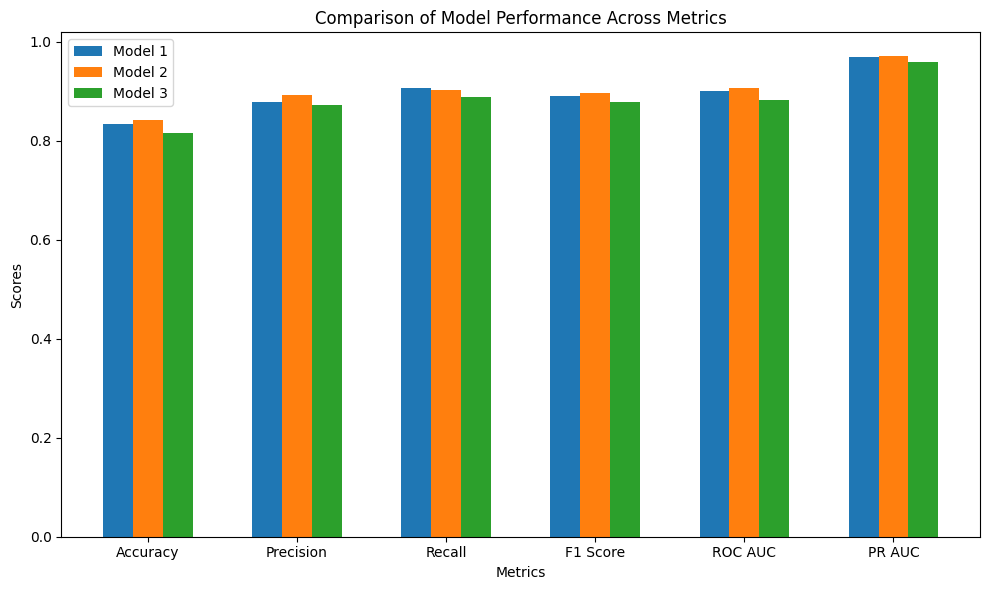

In [31]:
# Plotting the results
bar_width = 0.2
index = np.arange(len(metrics))

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot bars for each model
plt.bar(index, model_1_values, bar_width, label='Model 1')
plt.bar(index + bar_width, model_2_values, bar_width, label='Model 2')
plt.bar(index + 2 * bar_width, model_3_values, bar_width, label='Model 3')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance Across Metrics')

# Adding xticks
plt.xticks(index + bar_width, metrics)

# Adding legend
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

## First model

In [7]:
# First model (Hidden layer: one (16 nodes), Activation function: ReLU, Final actication function: Sigmoid)

# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# 8. 5-fold cross-validation の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各foldごとの評価指標を格納するリスト
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
fold_roc_aucs = []
fold_pr_aucs = []

In [17]:
# KFoldを使用してモデルのcross-validationを実施
for train_index, val_index in kf.split(X_train_ann):
    # Split the training data using iloc
    X_train_fold, X_val_fold = X_train_ann[train_index], X_train_ann[val_index]
    y_train_fold, y_val_fold = y_train_ann.iloc[train_index], y_train_ann.iloc[val_index]

    # モデルの再構築
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_fold.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)

    # 検証用データに対して予測
    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    # 各foldの評価指標を計算
    fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
    fold_precisions.append(precision_score(y_val_fold, y_val_pred))
    fold_recalls.append(recall_score(y_val_fold, y_val_pred))
    fold_f1_scores.append(f1_score(y_val_fold, y_val_pred))
    fold_roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    fold_pr_aucs.append(average_precision_score(y_val_fold, y_val_pred_prob))

# 5-fold cross-validationの結果を表示
print(f"Accuracy across folds: {fold_accuracies}")
print(f"Precision across folds: {fold_precisions}")
print(f"Recall across folds: {fold_recalls}")
print(f"F1 Score across folds: {fold_f1_scores}")
print(f"ROC AUC across folds: {fold_roc_aucs}")
print(f"PR AUC across folds: {fold_pr_aucs}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy across folds: [0.8709677419354839, 0.8032786885245902, 0.8360655737704918, 0.8688524590163934, 0.8360655737704918]
Precision across folds: [0.9166666666666666, 0.8409090909090909, 0.9347826086956522, 0.8846153846153846, 0.851063829787234]
Recall across folds: [0.9166666666666666, 0.8809523809523809, 0.86, 0.9583333333333334, 0.9302325581395349]
F1 Score across folds: [0.9166666666666666, 0.8604651162790697, 0.8958333333333334, 0.92, 0.8888888888888888]
ROC AUC across folds: [0.9479166666666666, 0.9110275689223059, 0.8400000000000001, 0.8493589743589745, 0.9224806201550387]
PR AUC across folds: [0.9857220090171217, 0.9635970619403522, 0.9599017912590969, 0.955234381233622, 0.9716283150964617]


In [18]:
# 各評価指標の平均を計算
avg_accuracy = np.mean(fold_accuracies)
avg_precision = np.mean(fold_precisions)
avg_recall = np.mean(fold_recalls)
avg_f1 = np.mean(fold_f1_scores)
avg_roc_auc = np.mean(fold_roc_aucs)
avg_pr_auc = np.mean(fold_pr_aucs)

# 平均結果を表示
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")
print(f"Average ROC AUC: {avg_roc_auc}")
print(f"Average PR AUC: {avg_pr_auc}")

Average Accuracy: 0.8430460074034902
Average Precision: 0.8856075161348057
Average Recall: 0.9092369878183831
Average F1 Score: 0.8963708010335918
Average ROC AUC: 0.8941567660205971
Average PR AUC: 0.9672167117093309


## Second model

In [10]:
# Second model (Hidden layer: two (16 and 8 nodes respectively), Activation function: ReLU, Final actication function: Sigmoid)
# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 隠れ層（ノード数は8、活性化関数はReLU）
model.add(Dense(8, activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# k-fold(5-fold) cross-validation (this is function used in "Model ecaluation" part)
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# 8. 5-fold cross-validation の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各foldごとの評価指標を格納するリスト
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
fold_roc_aucs = []
fold_pr_aucs = []


In [13]:
# KFoldを使用してモデルのcross-validationを実施
for train_index, val_index in kf.split(X_train_ann):
    X_train_fold, X_val_fold = X_train_ann[train_index], X_train_ann[val_index]

    # Use .iloc to access data by integer location
    y_train_fold, y_val_fold = y_train_ann.iloc[train_index], y_train_ann.iloc[val_index]

    # モデルの再構築
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_fold.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)

    # 検証用データに対して予測
    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    # 各foldの評価指標を計算
    fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
    fold_precisions.append(precision_score(y_val_fold, y_val_pred))
    fold_recalls.append(recall_score(y_val_fold, y_val_pred))
    fold_f1_scores.append(f1_score(y_val_fold, y_val_pred))
    fold_roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    fold_pr_aucs.append(average_precision_score(y_val_fold, y_val_pred_prob))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [14]:
# 5-fold cross-validationの結果を表示
print(f"Accuracy across folds: {fold_accuracies}")
print(f"Precision across folds: {fold_precisions}")
print(f"Recall across folds: {fold_recalls}")
print(f"F1 Score across folds: {fold_f1_scores}")
print(f"ROC AUC across folds: {fold_roc_aucs}")
print(f"PR AUC across folds: {fold_pr_aucs}")

Accuracy across folds: [0.8548387096774194, 0.7868852459016393, 0.8360655737704918, 0.8688524590163934, 0.8524590163934426]
Precision across folds: [0.9333333333333333, 0.8222222222222222, 0.9347826086956522, 0.9166666666666666, 0.8541666666666666]
Recall across folds: [0.875, 0.8809523809523809, 0.86, 0.9166666666666666, 0.9534883720930233]
F1 Score across folds: [0.9032258064516129, 0.8505747126436781, 0.8958333333333334, 0.9166666666666666, 0.9010989010989011]
ROC AUC across folds: [0.9553571428571428, 0.8759398496240601, 0.8309090909090908, 0.905448717948718, 0.9379844961240309]
PR AUC across folds: [0.9878723096456006, 0.9457571738310301, 0.9502610100061432, 0.974923403167667, 0.9754576124995638]


In [15]:
# 各評価指標の平均を計算
avg_accuracy = np.mean(fold_accuracies)
avg_precision = np.mean(fold_precisions)
avg_recall = np.mean(fold_recalls)
avg_f1 = np.mean(fold_f1_scores)
avg_roc_auc = np.mean(fold_roc_aucs)
avg_pr_auc = np.mean(fold_pr_aucs)

# 平均結果を表示
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")
print(f"Average ROC AUC: {avg_roc_auc}")
print(f"Average PR AUC: {avg_pr_auc}")

Average Accuracy: 0.8398202009518773
Average Precision: 0.8922342995169081
Average Recall: 0.8972214839424142
Average F1 Score: 0.8934798840388384
Average ROC AUC: 0.9011278594926087
Average PR AUC: 0.9668543018300009


## Third model

In [21]:
# Third model (Hidden layer: three (16, 8 and 4 nodes respectively), Activation function: ReLU, Final actication function: Sigmoid)
# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 隠れ層（ノード数は8、活性化関数はReLU）
model.add(Dense(8, activation='relu'))

# 隠れ層（ノード数は4、活性化関数はReLU）
model.add(Dense(4, activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 5-fold cross-validation の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 各foldごとの評価指標を格納するリスト
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []
fold_roc_aucs = []
fold_pr_aucs = []

In [23]:
# KFoldを使用してモデルのcross-validationを実施
for train_index, val_index in kf.split(X_train_ann):
    # Split the training data using iloc
    X_train_fold, X_val_fold = X_train_ann[train_index], X_train_ann[val_index]
    y_train_fold, y_val_fold = y_train_ann.iloc[train_index], y_train_ann.iloc[val_index]

    # モデルの再構築 (Third model with 3 hidden layers)
    model = Sequential()
    model.add(Dense(16, input_dim=X_train_fold.shape[1], activation='relu'))  # First hidden layer with 16 nodes
    model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 nodes
    model.add(Dense(4, activation='relu'))  # Third hidden layer with 4 nodes
    model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 node

    # モデルのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=10, verbose=0)

    # 検証用データに対して予測
    y_val_pred_prob = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int)

    # 各foldの評価指標を計算
    fold_accuracies.append(accuracy_score(y_val_fold, y_val_pred))
    fold_precisions.append(precision_score(y_val_fold, y_val_pred))
    fold_recalls.append(recall_score(y_val_fold, y_val_pred))
    fold_f1_scores.append(f1_score(y_val_fold, y_val_pred))
    fold_roc_aucs.append(roc_auc_score(y_val_fold, y_val_pred_prob))
    fold_pr_aucs.append(average_precision_score(y_val_fold, y_val_pred_prob))

# 5-fold cross-validationの結果を表示
print(f"Accuracy across folds: {fold_accuracies}")
print(f"Precision across folds: {fold_precisions}")
print(f"Recall across folds: {fold_recalls}")
print(f"F1 Score across folds: {fold_f1_scores}")
print(f"ROC AUC across folds: {fold_roc_aucs}")
print(f"PR AUC across folds: {fold_pr_aucs}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Accuracy across folds: [0.8709677419354839, 0.7868852459016393, 0.8032786885245902, 0.8524590163934426, 0.819672131147541]
Precision across folds: [0.9166666666666666, 0.8372093023255814, 0.9318181818181818, 0.8979591836734694, 0.8333333333333334]
Recall across folds: [0.9166666666666666, 0.8571428571428571, 0.82, 0.9166666666666666, 0.9302325581395349]
F1 Score across folds: [0.9166666666666666, 0.8470588235294118, 0.8723404255319149, 0.9072164948453608, 0.8791208791208791]
ROC AUC across folds: [0.9627976190476191, 0.8552631578947368, 0.8381818181818184, 0.8958333333333333, 0.9366925064599483]
PR AUC across folds: [0.9897062565055234, 0.9301652675914313, 0.9627909159040394, 0.9727944273949082, 0.9757160653665059]


In [24]:
# 各評価指標の平均を計算
avg_accuracy = np.mean(fold_accuracies)
avg_precision = np.mean(fold_precisions)
avg_recall = np.mean(fold_recalls)
avg_f1 = np.mean(fold_f1_scores)
avg_roc_auc = np.mean(fold_roc_aucs)
avg_pr_auc = np.mean(fold_pr_aucs)

# 平均結果を表示
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")
print(f"Average ROC AUC: {avg_roc_auc}")
print(f"Average PR AUC: {avg_pr_auc}")

Average Accuracy: 0.8266525647805395
Average Precision: 0.8833973335634464
Average Recall: 0.888141749723145
Average F1 Score: 0.8844806579388467
Average ROC AUC: 0.8977536869834912
Average PR AUC: 0.9662345865524816


In [ ]:
import numpy as np

In [ ]:
# Affine function (to transform data into linear model)
def affine(X, W, b):
    return np.dot(X, W) + b

In [ ]:
# ReLU function (to transform the linear model into the non-linear model)
def relu(X):
    return np.maximum(0, X)

In [ ]:
# Sigmoid function (to output probability for binary data)
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [ ]:
# Binary Crossentropy function (loss calculation)
def binary_crossentropy(y_true, y_pred):
    # Clip predictions to avoid log(0) errors
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
# Initialise weights and biases
def initialise_weights(input_size, layer_size):
    W = np.random.randn(input_size, layer_size) * 0.01
    b = np.zeros((1, layer_size))
    return W, b

In [ ]:
# Forward propagation (Affine -> Activation)
def forward_propagation(X, W, b, activation='relu'):
    Z = affine(X, W, b)
    if activation == 'relu':
        A = relu(Z)
    elif activation == 'sigmoid':
        A = sigmoid(Z)
    return A, Z

In [ ]:
# Derivative of sigmoid function
def sigmoid_derivative(A):
    return A * (1 - A)

# ⭐️Validation

## K-fold cross-validation

// Purpose: To evaluate the learning models with imbalanced dataset

// Potential Approaches: 1) Only one splitting and validating, or 2) using K-fold cross validation.

// Decision: This project implement the second approach because the project uses the imbalanced dataset.

In [ ]:
from sklearn.model_selection import KFold

# ⭐️Model evaluation

## Accuracy, Precision, Recall, F1-score, ROC AUC, and PR AUC

// Purpose: To find the best model in the three ANNs.

// Potential Approaches: 1) use only Accuracy, Precision, Recall, and F1-score or 2) use them and ROC AUC and PR AUC.

// Decision: the second approach is employed in this project since the output data is imbalanced; therefore, it requires to use the metrics so that the researchers evaluate the models to avoid the potential bias.

// Results: XXX

// Memo: Area under curve receiver operating characteristic (ROC AUC) and Area under curve precision-recall (PR AUC)

In [ ]:
# Accuracy

def calculate_accuracy(tp, tn, fp, fn):
    """Calculate Accuracy."""
    return (tp + tn) / (tp + tn + fp + fn)

In [ ]:
# Precision

def calculate_precision(tp, fp):
    """Calculate Precision."""
    return tp / (tp + fp) if (tp + fp) > 0 else 0

In [ ]:
# Recall

def calculate_recall(tp, fn):
    """Calculate Recall."""
    return tp / (tp + fn) if (tp + fn) > 0 else 0

In [ ]:
# F1-score

def calculate_f1(precision, recall):
    """Calculate F1-Score."""
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [ ]:
# ROC AUC

def calculate_roc_auc(tp, tn, fp, fn):
    """Calculate ROC AUC (Area Under the Curve for Receiver Operating Characteristic)."""
    tpr = tp / (tp + fn)  # True Positive Rate (Recall)
    fpr = fp / (fp + tn)  # False Positive Rate
    return (1 + tpr - fpr) / 2  # Simplified calculation for ROC AUC

In [ ]:
# PR AUC

def calculate_pr_auc(precision, recall):
    """Calculate PR AUC (Area Under the Precision-Recall Curve)."""
    return (precision + recall) / 2  # Simplified PR AUC calculation

In [ ]:
from sklearn.metrics import confusion_matrix

# Placeholder for storing results
metrics_results = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC AUC": [],
    "PR AUC": []
}



In [ ]:
# While compiling, k-fold cross-varidation is used




In [ ]:
# 8. モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 9. モデルの学習
model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3518 - loss: 1.0068
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4579 - loss: 0.8492
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6005 - loss: 0.7385
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 0.6651
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5927
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.5551
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.5228
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.4994  
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.4812 
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.4233 
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.3994 
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681

In [ ]:
# To show the results of k-fold cross-varidation (average is also specified)

In [ ]:
# Graph so that we could compare the three models

In [ ]:
# 10. モデルの評価
_, train_acc = model.evaluate(X_train_ann, y_train_ann, verbose=0)
_, test_acc = model.evaluate(X_test_ann, y_test_ann, verbose=0)

In [ ]:

# 11. テストデータでの予測
y_test_pred_ann = (model.predict(X_test_ann) > 0.5).astype(int)  # 出力を0/1に変換

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
# 12. 混同行列と評価レポートの作成
conf_matrix_ann = confusion_matrix(y_test_ann, y_test_pred_ann)
class_report_ann = classification_report(y_test_ann, y_test_pred_ann, target_names=sdgs_labels)

# 結果の表示
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("\nConfusion Matrix (ANN):\n", conf_matrix_ann)
print("\nClassification Report (ANN):\n", class_report_ann)

Training Accuracy: 0.8889
Test Accuracy: 0.8961

Confusion Matrix (ANN):
 [[ 7  6]
 [ 2 62]]

Classification Report (ANN):
                      precision    recall  f1-score   support

    Target Achieved       0.78      0.54      0.64        13
Target Not Achieved       0.91      0.97      0.94        64

           accuracy                           0.90        77
          macro avg       0.84      0.75      0.79        77
       weighted avg       0.89      0.90      0.89        77

